# ML BANK

## LOAD DATA   

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import chi2_contingency, ttest_ind, ks_2samp

In [102]:
df = pd.read_csv('Resources/loan_data.csv')

In [103]:
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [104]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [105]:
# Remove outliers
df = df[df['person_age'] <= 80]
df = df[df['person_income'] <= 850000]
df = df[df['loan_amnt'] <= 30000]
df.reset_index(drop=True,inplace=True)
df.tail(10)

#df = df[df['person_age'] <= 80]
#df = df[df['person_income'] <= 850000]
#df = df[df['loan_amnt'] <= 30000]
#df_sorted = df.sort_values(by='loan_amnt', ascending=False)
#df_sorted.head(10)

person_age person_gender person_education  person_income  \
44654        31.0          male           Master       136832.0   
44655        24.0          male      High School        37786.0   
44656        23.0        female         Bachelor        40925.0   
44657        27.0        female      High School        35512.0   
44658        24.0        female        Associate        31924.0   
44659        27.0          male        Associate        47971.0   
44660        37.0        female        Associate        65800.0   
44661        33.0          male        Associate        56942.0   
44662        29.0          male         Bachelor        33164.0   
44663        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
44654               9                  RENT    12319.0           PERSONAL   
44655               0              MORTGAGE    13500.0          EDUCATION   
44656               0                  RENT     9000.0           PERSONAL   
44657               4                  RENT     5000.0           PERSONAL   
44658               2                  RENT    12229.0            MEDICAL   
44659               6                  RENT    15000.0            MEDICAL   
44660              17                  RENT     9000.0    HOMEIMPROVEMENT   
44661               7                  RENT     2771.0  DEBTCONSOLIDATION   
44662               4                  RENT    12000.0          EDUCATION   
44663               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
44654          16.92                 0.09                         7.0   
44655          13.43                 0.36                         4.0   
44656          11.01                 0.22                         4.0   
44657          15.83                 0.14                         5.0   
44658          10.70                 0.38                         4.0   
44659          15.66                 0.31                         3.0   
44660          14.07                 0.14                        11.0   
44661          10.02                 0.05                        10.0   
44662          13.23                 0.36                         6.0   
44663          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
44654           722                             No            1  
44655           612                             No            1  
44656           487                             No            1  
44657           505                             No            1  
44658           678                             No            1  
44659           645                             No            1  
44660           621                             No            1  
44661           668                             No            1  
44662           604                             No            1  
44663           628                             No            1

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44664 entries, 0 to 44663
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44664 non-null  float64
 1   person_gender                   44664 non-null  object 
 2   person_education                44664 non-null  object 
 3   person_income                   44664 non-null  float64
 4   person_emp_exp                  44664 non-null  int64  
 5   person_home_ownership           44664 non-null  object 
 6   loan_amnt                       44664 non-null  float64
 7   loan_intent                     44664 non-null  object 
 8   loan_int_rate                   44664 non-null  float64
 9   loan_percent_income             44664 non-null  float64
 10  cb_person_cred_hist_length      44664 non-null  float64
 11  credit_score                    44664 non-null  int64  
 12  previous_loan_defaults_on_file  

In [107]:
df.shape

(44664, 14)

In [108]:
df.isnull().mean() * 100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

In [109]:
# Drop any null records
df = df.dropna()

In [110]:
# Validate that null records have been dropped
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [111]:
df = df.drop_duplicates()

In [112]:
# Check whether any rows were dropped
df.count()

person_age                        44664
person_gender                     44664
person_education                  44664
person_income                     44664
person_emp_exp                    44664
person_home_ownership             44664
loan_amnt                         44664
loan_intent                       44664
loan_int_rate                     44664
loan_percent_income               44664
cb_person_cred_hist_length        44664
credit_score                      44664
previous_loan_defaults_on_file    44664
loan_status                       44664
dtype: int64

## DATA VISUALIZATION

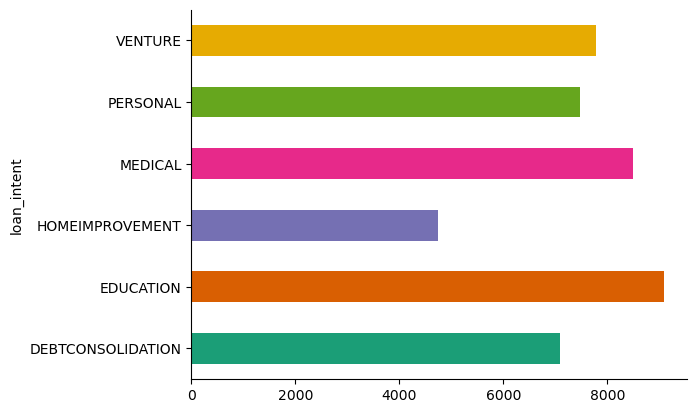

In [113]:
# @title loan_intent
df.groupby('loan_intent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

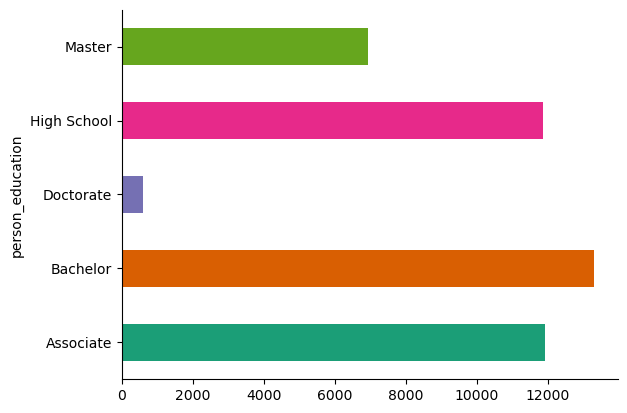

In [114]:
# @title person_education
df.groupby('person_education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

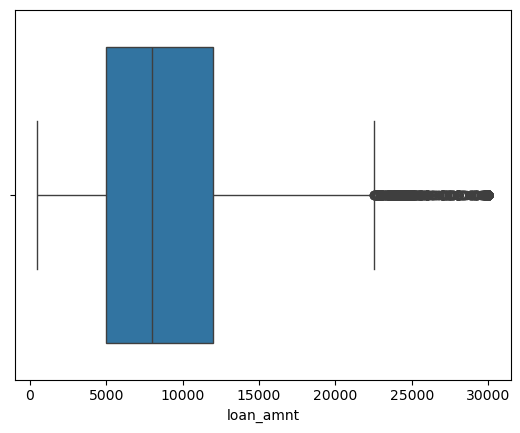

In [115]:
sns.boxplot(data=df,x='loan_amnt')
plt.show()

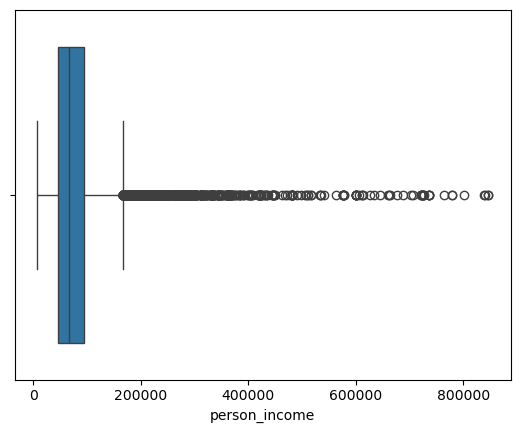

In [116]:
sns.boxplot(data=df,x='person_income')
plt.show()

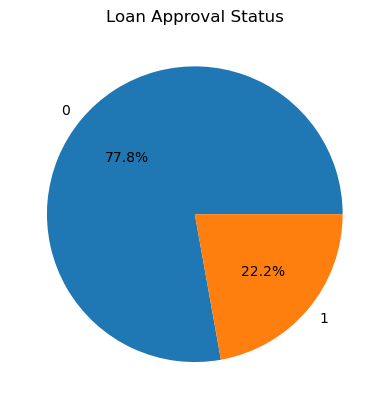

In [117]:
temp = df['loan_status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.title('Loan Approval Status')
plt.show()
#plt.savefig('Resources/Loan_Approval_Status.png')

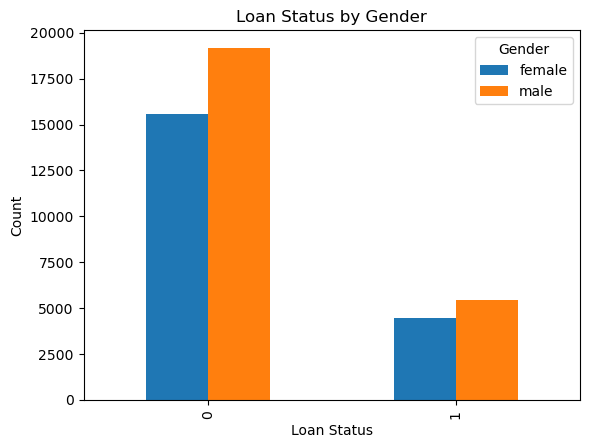

In [118]:
# Group by 'loan_status' and 'person_gender' and count
grouped_data = df.groupby(['loan_status', 'person_gender']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status by Gender')
plt.legend(title='Gender')
plt.show()
#plt.savefig('Resources/Loan_Status_Gender.png')


## LOAN DISCRIMINATORY ANALYSIS

In [119]:
# Load Data
data = df.copy()

In [120]:
# Preprocessing
# Convert categorical variables to numerical
label_encoders = {}
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [121]:
# Ensure target column is binary
assert set(data['loan_status'].unique()) == {0, 1}, "Target variable is not binary."

In [122]:
# Exploratory Data Analysis
print("Data Overview:\n", data.describe())

Data Overview:
          person_age  person_gender  person_education  person_income  \
count  44664.000000   44664.000000      44664.000000   44664.000000   
mean      27.724566       0.551697          1.744156   78341.709990   
std        5.873815       0.497326          1.479407   51222.354255   
min       20.000000       0.000000          0.000000    8000.000000   
25%       24.000000       0.000000          0.000000   47017.500000   
50%       26.000000       1.000000          1.000000   66944.500000   
75%       30.000000       1.000000          3.000000   94732.000000   
max       80.000000       1.000000          4.000000  846491.000000   

       person_emp_exp  person_home_ownership     loan_amnt   loan_intent  \
count    44664.000000           44664.000000  44664.000000  44664.000000   
mean         5.373433               1.702624   9420.559399      2.526218   
std          5.889584               1.439604   6005.302106      1.728391   
min          0.000000               0.00

### GENDER BIAS ANALYSIS

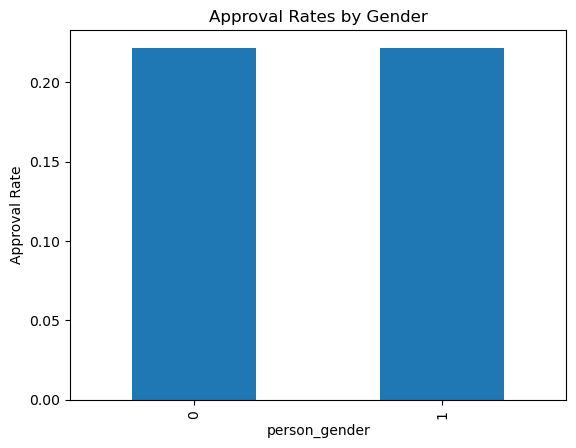

In [123]:
# Gender Bias Analysis
gender_counts = data.groupby('person_gender')['loan_status'].mean()
gender_counts.plot(kind='bar', title='Approval Rates by Gender')
plt.ylabel('Approval Rate')
plt.show()

### AGE BIAS ANALYSIS

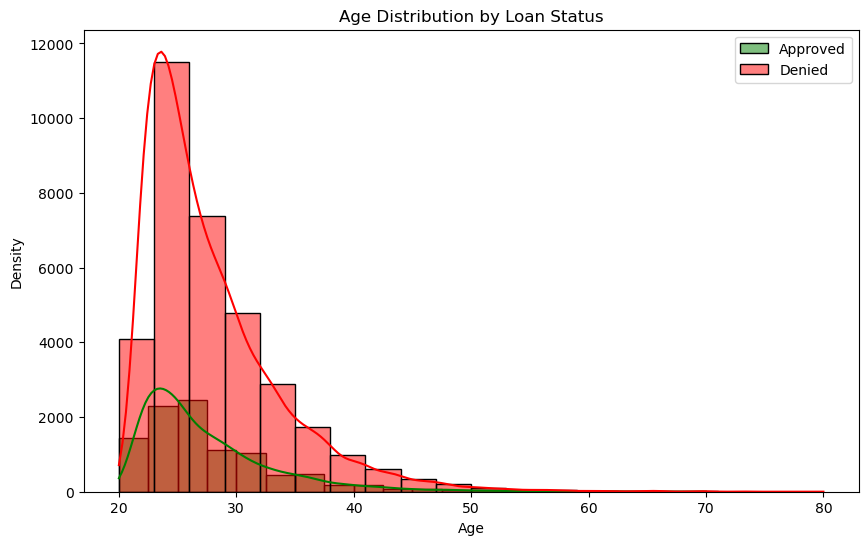

In [124]:
# Age Bias Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data[data['loan_status'] == 1]['person_age'], kde=True, label='Approved', color='green', bins=20)
sns.histplot(data[data['loan_status'] == 0]['person_age'], kde=True, label='Denied', color='red', bins=20)
plt.legend()
plt.title('Age Distribution by Loan Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [125]:
# Approval rates by age group
data['age_group'] = pd.cut(data['person_age'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65], right=False)
approval_rates_by_age_group = data.groupby('age_group')['loan_status'].mean()
print("Approval Rates by Age Group:\n", approval_rates_by_age_group)

Approval Rates by Age Group:
 age_group
[20, 25)    0.235302
[25, 30)    0.218593
[30, 35)    0.206004
[35, 40)    0.211780
[40, 45)    0.200314
[45, 50)    0.215842
[50, 55)    0.245000
[55, 60)    0.216867
[60, 65)    0.418605
Name: loan_status, dtype: float64


C:\Users\tbord\AppData\Local\Temp\ipykernel_29716\4072970061.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



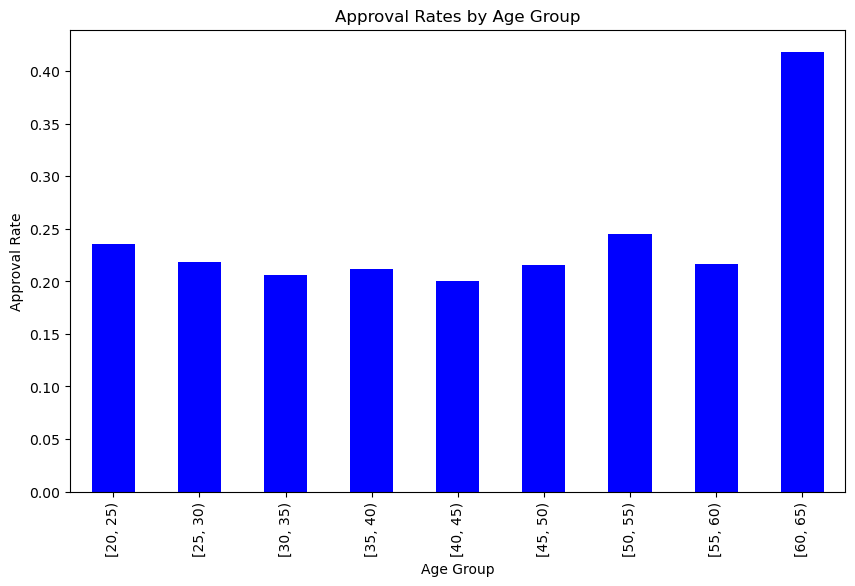

In [126]:
# Plotting approval rates by age group
approval_rates_by_age_group.plot(kind='bar', title='Approval Rates by Age Group', color='blue', figsize=(10, 6))
plt.ylabel('Approval Rate')
plt.xlabel('Age Group')
plt.show()

In [127]:
# Identify age groups with disproportionately low approval rates
low_approval_groups = approval_rates_by_age_group[approval_rates_by_age_group < approval_rates_by_age_group.mean()]
print("Age Groups with Disproportionately Low Approval Rates:\n", low_approval_groups)


Age Groups with Disproportionately Low Approval Rates:
 age_group
[20, 25)    0.235302
[25, 30)    0.218593
[30, 35)    0.206004
[35, 40)    0.211780
[40, 45)    0.200314
[45, 50)    0.215842
[55, 60)    0.216867
Name: loan_status, dtype: float64


### STATISTICAL TESTS FOR BIAS

#### CHI-SQUARE TEST FOR GENDER BIAS

In [128]:
# Statistical Tests for Bias
# Gender Bias (Chi-Square Test)
gender_contingency = pd.crosstab(data['person_gender'], data['loan_status'])
chi2, p, _, _ = chi2_contingency(gender_contingency)
print(f"Gender Bias Chi-Square Test: chi2 = {chi2:.3f}, p-value = {p:.3f}")
if p < 0.05:
    print("Conclusion: The data shows evidence of gender-based discrimination.")
else:
    print("Conclusion: No significant gender-based discrimination detected.")


Gender Bias Chi-Square Test: chi2 = 0.000, p-value = 0.999
Conclusion: No significant gender-based discrimination detected.


#### T-TEST FOR AGE BIAS

In [129]:
# Age Bias (T-Test)
approved_age = data[data['loan_status'] == 1]['person_age']
denied_age = data[data['loan_status'] == 0]['person_age']
t_stat, p_value = ttest_ind(approved_age, denied_age)
print(f"Age Bias T-Test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Conclusion: The data shows evidence of age-based discrimination.")
else:
    print("Conclusion: No significant age-based discrimination detected.")

Age Bias T-Test: t-statistic = -4.563, p-value = 0.000
Conclusion: The data shows evidence of age-based discrimination.


#### KOLMOGOROV-SMIRNOV TEST FOR AGE DISTRIBUTIONS

In [130]:
# Kolmogorov-Smirnov Test for age distributions
ks_stat, ks_p = ks_2samp(approved_age, denied_age)
print(f"Kolmogorov-Smirnov Test: KS Statistic = {ks_stat:.3f}, p-value = {ks_p:.3f}")
if ks_p < 0.05:
    print("Conclusion: The age distributions between approved and denied applicants differ significantly.")
else:
    print("Conclusion: No significant difference in age distributions between approved and denied applicants.")


Kolmogorov-Smirnov Test: KS Statistic = 0.032, p-value = 0.000
Conclusion: The age distributions between approved and denied applicants differ significantly.


## DATA PREPARATION

### USE OneHotEncoder TO TRANSFORM CATEGORICAL COLUMNS THAT ARE NOMINAL

In [131]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_categorical_features = encoder.fit_transform(df[['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])
encoded_df = pd.DataFrame(encoder_categorical_features, columns=encoder.get_feature_names_out())

In [132]:
encoded_df.head()

person_gender_female  person_gender_male  person_home_ownership_MORTGAGE  \
0                   1.0                 0.0                             0.0   
1                   1.0                 0.0                             1.0   
2                   1.0                 0.0                             0.0   
3                   1.0                 0.0                             0.0   
4                   1.0                 0.0                             0.0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                          0.0                        1.0   
1                          0.0                        0.0   
2                          0.0                        1.0   
3                          0.0                        1.0   
4                          0.0                        1.0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    1.0                          0.0                  0.0   
1                    0.0                          0.0                  1.0   
2                    0.0                          0.0                  0.0   
3                    0.0                          0.0                  0.0   
4                    0.0                          1.0                  0.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   0.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  1.0   
3                   0.0                  1.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                0.0                                 1.0  
1                                1.0                                 0.0  
2                                1.0                                 0.0  
3                                1.0                                 0.0  
4                                1.0                                 0.0

### USE LABEL ENCODER TO TRANSFORM CATEGORICAL COLUMN THAT IS ORDINAL

In [133]:
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['person_education'])
new_df = pd.concat([df, encoded_df], axis=1)

In [134]:
new_df.drop(['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'person_education'], axis=1, inplace=True)

In [135]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44664 entries, 0 to 44663
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          44664 non-null  float64
 1   person_income                       44664 non-null  float64
 2   person_emp_exp                      44664 non-null  int64  
 3   loan_amnt                           44664 non-null  float64
 4   loan_int_rate                       44664 non-null  float64
 5   loan_percent_income                 44664 non-null  float64
 6   cb_person_cred_hist_length          44664 non-null  float64
 7   credit_score                        44664 non-null  int64  
 8   loan_status                         44664 non-null  int64  
 9   education_encoded                   44664 non-null  int32  
 10  person_gender_female                44664 non-null  float64
 11  person_gender_male                  44664

### PCA ANALYSIS & DATA VISUALIZATION

In [136]:
new_df.head()
super_new = new_df.copy()
super_new.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        21.0        12282.0               0     1000.0          11.14   
1        25.0        12438.0               3     5500.0          12.87   
2        21.0        12951.0               0     2500.0           7.14   
3        21.0        12739.0               0     1600.0          14.74   
4        21.0        13113.0               0     4500.0           8.63   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.08                         2.0           504            0   
1                 0.44                         3.0           635            1   
2                 0.19                         2.0           532            1   
3                 0.13                         3.0           640            1   
4                 0.34                         2.0           651            1   

   education_encoded  ...  person_home_ownership_OWN  \
0                  3  ...                        1.0   
1                  3  ...                        0.0   
2                  3  ...                        1.0   
3                  3  ...                        1.0   
4                  0  ...                        1.0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    1.0                          0.0                  0.0   
1                    0.0                          0.0                  1.0   
2                    0.0                          0.0                  0.0   
3                    0.0                          0.0                  0.0   
4                    0.0                          1.0                  0.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   0.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  1.0   
3                   0.0                  1.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                0.0                                 1.0  
1                                1.0                                 0.0  
2                                1.0                                 0.0  
3                                1.0                                 0.0  
4                                1.0                                 0.0  

[5 rows x 24 columns]

In [137]:
pca_scaled = StandardScaler().fit_transform(new_df[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']])
pca_scaled

array([[-1.14485063, -1.28968007, -0.9123722 , ..., -0.68267184,
        -0.99777967, -2.55183954],
       [-0.4638546 , -1.28663449, -0.40299268, ...,  3.47484131,
        -0.73870592,  0.04801456],
       [-1.14485063, -1.27661922, -0.9123722 , ...,  0.5876794 ,
        -0.99777967, -1.99614553],
       ...,
       [ 0.89813746, -0.41778536,  0.27618002, ..., -1.02913127,
         1.07481038,  0.70293964],
       [ 0.21714143, -0.88200194, -0.2331995 , ...,  2.5509495 ,
         0.03851535, -0.56721809],
       [-0.63410361, -0.52190122, -0.74257902, ..., -0.10523946,
        -0.73870592, -0.09090894]])

In [138]:
df_pca_scaled = pd.DataFrame(pca_scaled, columns=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'])

In [139]:
super_new.drop(['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'], axis=1, inplace=True)


In [140]:

df_pca = pd.merge(df_pca_scaled, super_new, left_index=True, right_index=True)
df_pca.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -1.144851      -1.289680       -0.912372  -1.402203       0.048239   
1   -0.463855      -1.286634       -0.402993  -0.652857       0.630179   
2   -1.144851      -1.276619       -0.912372  -1.152421      -1.297289   
3   -1.144851      -1.280758       -0.912372  -1.302290       1.259214   
4   -1.144851      -1.273457       -0.912372  -0.819378      -0.796080   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0            -0.682672                   -0.997780     -2.551840            0   
1             3.474841                   -0.738706      0.048015            1   
2             0.587679                   -0.997780     -1.996146            1   
3            -0.105239                   -0.738706      0.147246            1   
4             2.319977                   -0.997780      0.365554            1   

   education_encoded  ...  person_home_ownership_OWN  \
0                  3  ...                        1.0   
1                  3  ...                        0.0   
2                  3  ...                        1.0   
3                  3  ...                        1.0   
4                  0  ...                        1.0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    1.0                          0.0                  0.0   
1                    0.0                          0.0                  1.0   
2                    0.0                          0.0                  0.0   
3                    0.0                          0.0                  0.0   
4                    0.0                          1.0                  0.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   0.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  1.0   
3                   0.0                  1.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                0.0                                 1.0  
1                                1.0                                 0.0  
2                                1.0                                 0.0  
3                                1.0                                 0.0  
4                                1.0                                 0.0  

[5 rows x 24 columns]

In [141]:
features = ['person_income', 'credit_score', 'loan_amnt', 'person_emp_exp'] 
X = df_pca[features]
df_kmeans = df_pca.copy()
kmeans = KMeans(n_clusters=2)
df_kmeans['cluster'] = kmeans.fit_predict(X)
df_kmeans.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -1.144851      -1.289680       -0.912372  -1.402203       0.048239   
1   -0.463855      -1.286634       -0.402993  -0.652857       0.630179   
2   -1.144851      -1.276619       -0.912372  -1.152421      -1.297289   
3   -1.144851      -1.280758       -0.912372  -1.302290       1.259214   
4   -1.144851      -1.273457       -0.912372  -0.819378      -0.796080   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0            -0.682672                   -0.997780     -2.551840            0   
1             3.474841                   -0.738706      0.048015            1   
2             0.587679                   -0.997780     -1.996146            1   
3            -0.105239                   -0.738706      0.147246            1   
4             2.319977                   -0.997780      0.365554            1   

   education_encoded  ...  person_home_ownership_RENT  \
0                  3  ...                         0.0   
1                  3  ...                         0.0   
2                  3  ...                         0.0   
3                  3  ...                         0.0   
4                  0  ...                         0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    1.0   
1                            0.0                    0.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   0.0   
1                          0.0                  1.0                   0.0   
2                          0.0                  0.0                   0.0   
3                          0.0                  0.0                   0.0   
4                          1.0                  0.0                   0.0   

   loan_intent_VENTURE  previous_loan_defaults_on_file_No  \
0                  0.0                                0.0   
1                  0.0                                1.0   
2                  1.0                                1.0   
3                  1.0                                1.0   
4                  0.0                                1.0   

   previous_loan_defaults_on_file_Yes  cluster  
0                                 1.0        0  
1                                 0.0        0  
2                                 0.0        0  
3                                 0.0        0  
4                                 0.0        0  

[5 rows x 25 columns]

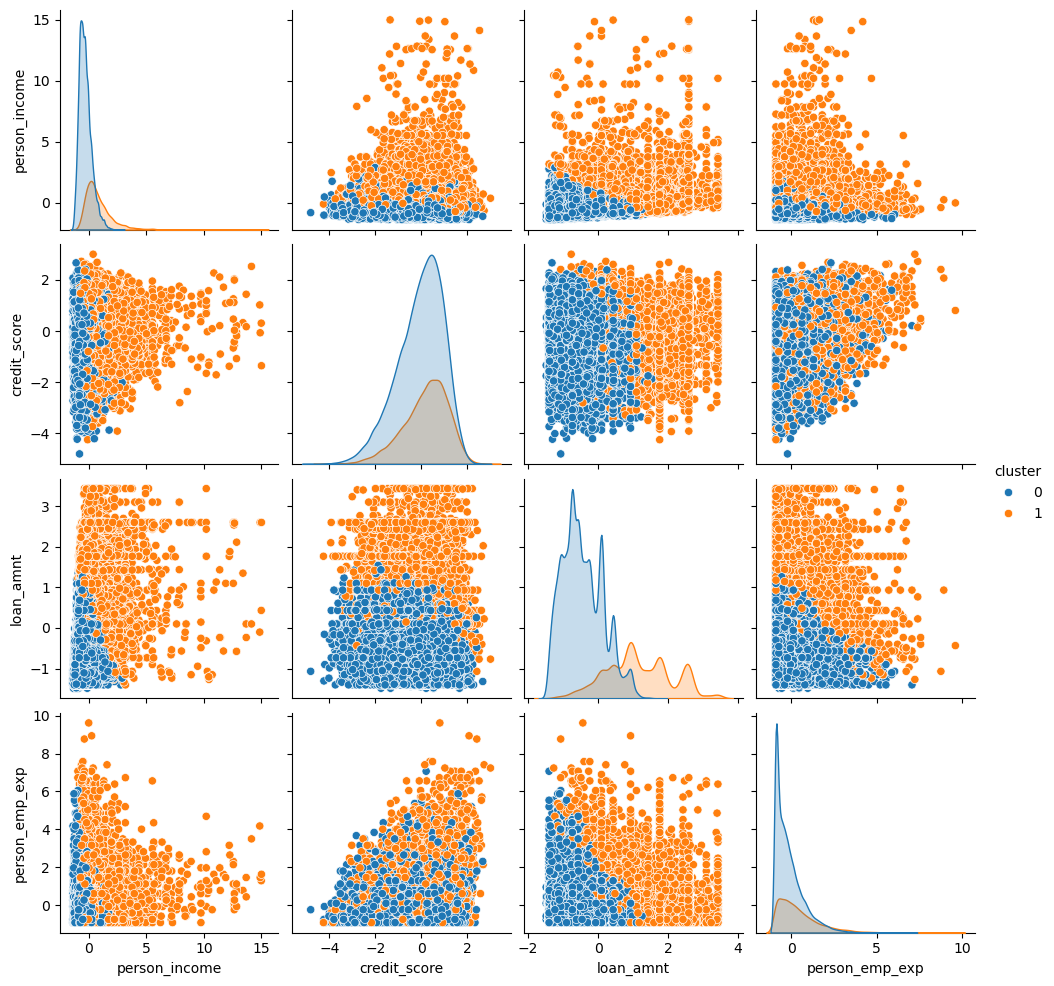

In [142]:
sns.pairplot(df_kmeans[features + ['cluster']], hue='cluster')
plt.show()

In [143]:
pca=PCA(n_components=10)
customers_pca = pca.fit_transform(df_pca)
customers_pca[:5]

array([[-2.42853593,  1.11514695, -1.42881332, -0.93593295, -1.53671873,
         1.81264689,  0.76307205, -0.40315064, -0.40975481,  0.79349953],
       [-1.25161813,  1.14134768,  2.45320543, -1.95902652, -0.32066845,
        -0.37287096,  0.78639115,  0.06228771, -1.38565332, -0.53568345],
       [-2.36409676,  1.10863046, -0.43312646, -1.31566398, -1.91149808,
         0.27551313,  0.77212184,  1.19402456, -0.66973394, -0.2019858 ],
       [-1.82862357,  1.17859886, -0.1557146 , -1.66449628,  1.21708451,
         0.67262237,  0.76459963,  0.12638706, -0.78086898, -0.18222259],
       [-1.87712767, -1.86139841,  1.12896481, -1.72194993, -0.45624479,
        -1.38475115,  0.76461294,  0.50247839, -0.64290235, -0.07897997]])

In [144]:
#pca.explained_variance_ratio_
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

90.9840294422462

In [145]:
customers_pca_df = pd.DataFrame(customers_pca,columns=["PCA1", "PCA2","PCA3", "PCA4","PCA5","PCA6", "PCA7","PCA8", "PCA9","PCA10"])
customers_pca_df.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -2.428536  1.115147 -1.428813 -0.935933 -1.536719  1.812647  0.763072   
1 -1.251618  1.141348  2.453205 -1.959027 -0.320668 -0.372871  0.786391   
2 -2.364097  1.108630 -0.433126 -1.315664 -1.911498  0.275513  0.772122   
3 -1.828624  1.178599 -0.155715 -1.664496  1.217085  0.672622  0.764600   
4 -1.877128 -1.861398  1.128965 -1.721950 -0.456245 -1.384751  0.764613   

       PCA8      PCA9     PCA10  
0 -0.403151 -0.409755  0.793500  
1  0.062288 -1.385653 -0.535683  
2  1.194025 -0.669734 -0.201986  
3  0.126387 -0.780869 -0.182223  
4  0.502478 -0.642902 -0.078980

In [146]:
df_3d = px.data.iris()
features = ['person_income', 'credit_score', 'loan_amnt'] 
X = df_pca[features]

pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(X)

total_var = pca_3d.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components_3d, x=0, y=1, z=2, color=df_pca['loan_status'],
    title='Loan Amount vs. Income vs. Credit score',
    labels={'0': 'Income', '1': 'Credit Score', '2': 'Loan Amount'}
)
#title=f'Total Explained Variance: {total_var:.2f}%',
fig.show()

In [147]:
df_pca_plot = customers_pca_df.copy()
df_pca_plot['loan_status'] = df_pca['loan_status']
df_pca_plot.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -2.428536  1.115147 -1.428813 -0.935933 -1.536719  1.812647  0.763072   
1 -1.251618  1.141348  2.453205 -1.959027 -0.320668 -0.372871  0.786391   
2 -2.364097  1.108630 -0.433126 -1.315664 -1.911498  0.275513  0.772122   
3 -1.828624  1.178599 -0.155715 -1.664496  1.217085  0.672622  0.764600   
4 -1.877128 -1.861398  1.128965 -1.721950 -0.456245 -1.384751  0.764613   

       PCA8      PCA9     PCA10  loan_status  
0 -0.403151 -0.409755  0.793500            0  
1  0.062288 -1.385653 -0.535683            1  
2  1.194025 -0.669734 -0.201986            1  
3  0.126387 -0.780869 -0.182223            1  
4  0.502478 -0.642902 -0.078980            1

In [148]:
# inertia = []
# k = list(range(1, 11))

# for i in k:
#     k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
#     k_model.fit(customers_pca_df)
#     inertia.append(k_model.inertia_)

# elbow_data = {"k": k, "inertia": inertia}
# df_elbow = pd.DataFrame(elbow_data)
# df_elbow.head()

In [149]:
# df_elbow.plot.line(
#     x="k", 
#     y="inertia", 
#     title="Elbow Curve", 
#     xticks=k
# )

In [150]:
# model = KMeans(n_clusters=4, n_init='auto', random_state=0)
# model.fit(customers_pca_df)
# k_3 = model.predict(customers_pca_df)
# customer_pca_predictions_df = customers_pca_df.copy()
# customer_pca_predictions_df["customer_segments"] = k_3

In [151]:
# model_k2 = KMeans(n_clusters=2, n_init='auto')
# model_k2.fit(df_pca)

In [152]:
# customer_segments_k2 = model_k2.predict(df_pca)
# print(customer_segments_k2)

In [153]:
# customer_predictions = df_pca.copy()
# customer_predictions["Customer Segment (k=2)"] = customer_segments_k2
# customer_predictions.head()

In [154]:
# customer_predictions.plot.scatter(
#     x="loan_amnt", 
#     y="credit_score", 
#     c="Customer Segment (k=2)",
#     title = "k=2",
#     colormap='winter'
# )

### SEPARATE X AND Y DATA

In [155]:
y = new_df['loan_status']
y

0        0
1        1
2        1
3        1
4        1
        ..
44659    1
44660    1
44661    1
44662    1
44663    1
Name: loan_status, Length: 44664, dtype: int64

In [156]:
y.value_counts()

loan_status
0    34761
1     9903
Name: count, dtype: int64

In [157]:
X = new_df.drop('loan_status', axis=1)
X

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            21.0        12282.0               0     1000.0          11.14   
1            25.0        12438.0               3     5500.0          12.87   
2            21.0        12951.0               0     2500.0           7.14   
3            21.0        12739.0               0     1600.0          14.74   
4            21.0        13113.0               0     4500.0           8.63   
...           ...            ...             ...        ...            ...   
44659        27.0        47971.0               6    15000.0          15.66   
44660        37.0        65800.0              17     9000.0          14.07   
44661        33.0        56942.0               7     2771.0          10.02   
44662        29.0        33164.0               4    12000.0          13.23   
44663        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.08                         2.0           504   
1                     0.44                         3.0           635   
2                     0.19                         2.0           532   
3                     0.13                         3.0           640   
4                     0.34                         2.0           651   
...                    ...                         ...           ...   
44659                 0.31                         3.0           645   
44660                 0.14                        11.0           621   
44661                 0.05                        10.0           668   
44662                 0.36                         6.0           604   
44663                 0.13                         3.0           628   

       education_encoded  person_gender_female  ...  \
0                      3                   1.0  ...   
1                      3                   1.0  ...   
2                      3                   1.0  ...   
3                      3                   1.0  ...   
4                      0                   1.0  ...   
...                  ...                   ...  ...   
44659                  0                   0.0  ...   
44660                  0                   1.0  ...   
44661                  0                   0.0  ...   
44662                  1                   0.0  ...   
44663                  3                   0.0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
0                            1.0                         0.0   
1                            0.0                         0.0   
2                            1.0                         0.0   
3                            1.0                         0.0   
4                            1.0                         0.0   
...                          ...                         ...   
44659                        0.0                         1.0   
44660                        0.0                         1.0   
44661                        0.0                         1.0   
44662                        0.0                         1.0   
44663                        0.0                         1.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                                0.0                    1.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
3                                0.0                    0.0   
4                                0.0                    0.0   
...                              ...                    ...   
44659                            0.0                    0.0   
44660                            0.0                    0.0   
44661                            1.0                    0.0   
44662                            0.0                    1.0   
44663                            1.0                    0.0   

       loan_intent

### PERFORM TRAIN TEST SPLIT

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [159]:
X_train

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
3249         26.0        29762.0               1     3600.0          14.96   
7968         22.0        36715.0               0     7200.0           8.90   
13755        24.0       115979.0               1    15000.0           7.51   
11258        22.0        66892.0               2    10000.0          10.37   
39731        34.0        51221.0              12     2000.0          10.73   
...           ...            ...             ...        ...            ...   
16304        24.0        87365.0               2    15000.0          10.99   
79           26.0       279664.0               3    25000.0          14.17   
12119        23.0        97004.0               5     7000.0          16.29   
14147        21.0       121890.0               0    14000.0          10.25   
38408        31.0        91113.0               7     1199.0           6.56   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
3249                  0.12                         4.0           664   
7968                  0.20                         2.0           633   
13755                 0.13                         4.0           560   
11258                 0.15                         2.0           601   
39731                 0.04                         9.0           648   
...                    ...                         ...           ...   
16304                 0.17                         2.0           665   
79                    0.09                         2.0           642   
12119                 0.07                         3.0           663   
14147                 0.11                         2.0           554   
38408                 0.01                         5.0           692   

       education_encoded  person_gender_female  ...  \
3249                   0                   1.0  ...   
7968                   3                   1.0  ...   
13755                  3                   0.0  ...   
11258                  1                   1.0  ...   
39731                  0                   0.0  ...   
...                  ...                   ...  ...   
16304                  1                   1.0  ...   
79                     3                   0.0  ...   
12119                  1                   0.0  ...   
14147                  0                   0.0  ...   
38408                  4                   1.0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
3249                         0.0                         1.0   
7968                         0.0                         1.0   
13755                        0.0                         0.0   
11258                        0.0                         1.0   
39731                        0.0                         1.0   
...                          ...                         ...   
16304                        0.0                         1.0   
79                           0.0                         0.0   
12119                        0.0                         0.0   
14147                        0.0                         0.0   
38408                        0.0                         1.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
3249                             0.0                    0.0   
7968                             0.0                    0.0   
13755                            1.0                    0.0   
11258                            0.0                    0.0   
39731                            0.0                    0.0   
...                              ...                    ...   
16304                            0.0                    1.0   
79                               0.0                    0.0   
12119                            0.0                    1.0   
14147                            1.0                    0.0   
38408                            0.0                    0.0   

       loan_intent

In [160]:
X_test

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
37927        25.0        42748.0               3     5000.0           6.25   
6475         26.0        60947.0               3    17200.0           7.51   
28469        31.0        94404.0               5    16250.0          10.99   
25662        31.0        94696.0              12     5000.0          11.01   
9983         23.0        79144.0               0     9000.0           7.88   
...           ...            ...             ...        ...            ...   
11529        24.0        91232.0               1     7000.0           7.66   
254          22.0       210555.0               0    18000.0          11.01   
392          25.0        80492.0               4    24000.0           6.99   
28081        31.0        68434.0              10     7500.0          11.48   
9548         23.0        75593.0               0     4000.0           7.43   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
37927                 0.12                         4.0           601   
6475                  0.28                         4.0           573   
28469                 0.17                         9.0           690   
25662                 0.05                         5.0           665   
9983                  0.11                         3.0           651   
...                    ...                         ...           ...   
11529                 0.08                         4.0           525   
254                   0.09                         2.0           652   
392                   0.30                         3.0           602   
28081                 0.11                         6.0           550   
9548                  0.05                         3.0           589   

       education_encoded  person_gender_female  ...  \
37927                  4                   0.0  ...   
6475                   0                   0.0  ...   
28469                  1                   1.0  ...   
25662                  3                   1.0  ...   
9983                   0                   0.0  ...   
...                  ...                   ...  ...   
11529                  1                   1.0  ...   
254                    0                   0.0  ...   
392                    1                   0.0  ...   
28081                  3                   0.0  ...   
9548                   0                   1.0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
37927                        0.0                         1.0   
6475                         0.0                         0.0   
28469                        0.0                         0.0   
25662                        0.0                         0.0   
9983                         0.0                         0.0   
...                          ...                         ...   
11529                        0.0                         0.0   
254                          0.0                         0.0   
392                          0.0                         1.0   
28081                        0.0                         1.0   
9548                         0.0                         0.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
37927                            0.0                    0.0   
6475                             0.0                    0.0   
28469                            0.0                    0.0   
25662                            0.0                    1.0   
9983                             0.0                    1.0   
...                              ...                    ...   
11529                            0.0                    0.0   
254                              0.0                    1.0   
392                              0.0                    1.0   
28081                            0.0                    0.0   
9548                             0.0                    0.0   

       loan_intent

## LOGISTIC REGRESSION MODEL 

In [161]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_train)

print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")


Training Data Score: 0.8868769415913352
Testing Data Score: 0.8832419120116423


c:\Users\tbord\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [162]:
lr_results_df = pd.DataFrame({"Prediction": lr_pred, "Actual": y_train})
lr_results_df

Prediction  Actual
3249            1       1
7968            0       1
13755           0       0
11258           0       0
39731           0       0
...           ...     ...
16304           0       0
79              0       0
12119           0       0
14147           0       0
38408           0       0

[35731 rows x 2 columns]

In [163]:
lr_testing_pred = lr.predict(X_test)
lr_results_df = pd.DataFrame({
    "Testing Data Predictions": lr_testing_pred, 
    "Testing Data Actual Targets": y_test})
lr_results_df

Testing Data Predictions  Testing Data Actual Targets
37927                         0                            0
6475                          0                            0
28469                         0                            0
25662                         0                            1
9983                          0                            0
...                         ...                          ...
11529                         0                            0
254                           0                            0
392                           1                            1
28081                         0                            0
9548                          0                            0

[8933 rows x 2 columns]

In [164]:
mse = mean_squared_error(y_test,lr_testing_pred)
lr_acc_score = accuracy_score(y_test, lr_testing_pred)
conf_matrix = confusion_matrix(y_test, lr_testing_pred)
f1_score_lr_model = f1_score(y_test, lr_testing_pred)

print(f"Mean Squared Error : {mse}")
print(f"Logistic Regression Accuracy Score : {lr_acc_score}")
print(f"LR F1 Score: {f1_score_lr_model}")
print(f"Confusion Matrix:")
print(conf_matrix)

Mean Squared Error : 0.11675808798835778
Logistic Regression Accuracy Score : 0.8832419120116423
LR F1 Score: 0.7331798413916603
Confusion Matrix:
[[6457  532]
 [ 511 1433]]


## SVC MODEL (DO NOT RUN, TAKES WAY TOO LONG!!!)

In [165]:
# scaler = StandardScaler().fit(X_train)

# # Scale the training data
# X_train_scaled = scaler.transform(X_train)

# # Scale the test data
# X_test_scaled = scaler.transform(X_test)

# svc_model = SVC(kernel='poly')

# param_grid = {
#     'C': [0.1, 1, 10],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto', 0.1, 1],
#     'coef0': [0.0, 1.0]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters:", grid_search.best_params_)

In [166]:
# # Get the best estimator
# best_svc = grid_search.best_estimator_

# # Make predictions on the test data
# best_svc_pred = best_svc.predict(X_test_scaled)

# print("Accuracy score:", grid_search.score(X_test_scaled, y_test))

In [167]:
# svc_model.fit(X_train, y_train)

# svc_pred = svc_model.predict(X_test_scaled)
# svc_acc_score = accuracy_score(y_test, svc_pred)

# print('Train Accuracy: %.3f' % svc_model.score(X_train, y_train))
# print('Test Accuracy: %.3f' % svc_model.score(X_test, y_test))
# print(f"Accuracy Score : {svc_acc_score}")

## K-NEAREST NEIGHBORS MODEL 

In [168]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.811
k: 3, Train/Test Score: 0.901/0.831
k: 5, Train/Test Score: 0.877/0.837
k: 7, Train/Test Score: 0.868/0.840
k: 9, Train/Test Score: 0.862/0.842
k: 11, Train/Test Score: 0.859/0.844
k: 13, Train/Test Score: 0.856/0.845
k: 15, Train/Test Score: 0.853/0.844
k: 17, Train/Test Score: 0.853/0.847
k: 19, Train/Test Score: 0.850/0.846


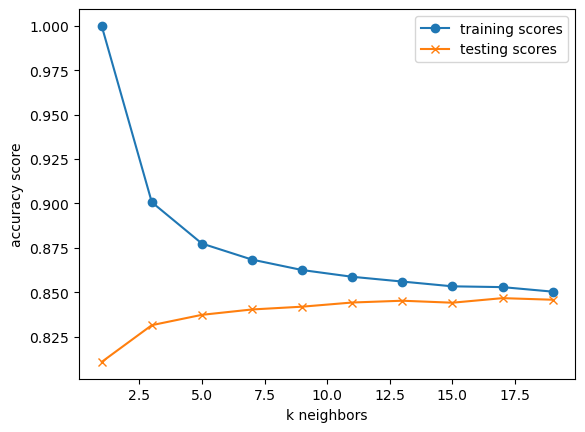

In [169]:
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [170]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

# Use GridSearchCV to find the best value for n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best value of n_neighbors
print(grid_search.best_params_)

{'n_neighbors': 19}


In [171]:
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_y_pred)

f1_score_knn_model = f1_score(y_test, knn_y_pred)

print(f"KNN Accuracy Score : {knn_acc_score}")
print(f"KNN F1 Score: {f1_score_knn_model}")

KNN Accuracy Score : 0.844061345572596
KNN F1 Score: 0.5759512937595129


## EXTREME GRADIENT BOOSTING - XGBOOST MODEL 

In [172]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)
xgb_model.fit(X_train,y_train)

xgb_y_pred = xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_y_pred)

f1_score_xgb_model = f1_score(y_test, xgb_y_pred)

print(f"Training Data Score: {xgb_model.score(X_train, y_train)}")
print(f'Testing Score: {xgb_model.score(X_test, y_test)}')
print(f"XGB Accuracy Score : {xgb_acc_score}")
print(f"XGB F1 Score: {f1_score_xgb_model}")

Training Data Score: 0.9684867482018416
Testing Score: 0.9314899809694391
XGB Accuracy Score : 0.9314899809694391
XGB F1 Score: 0.8350404312668464


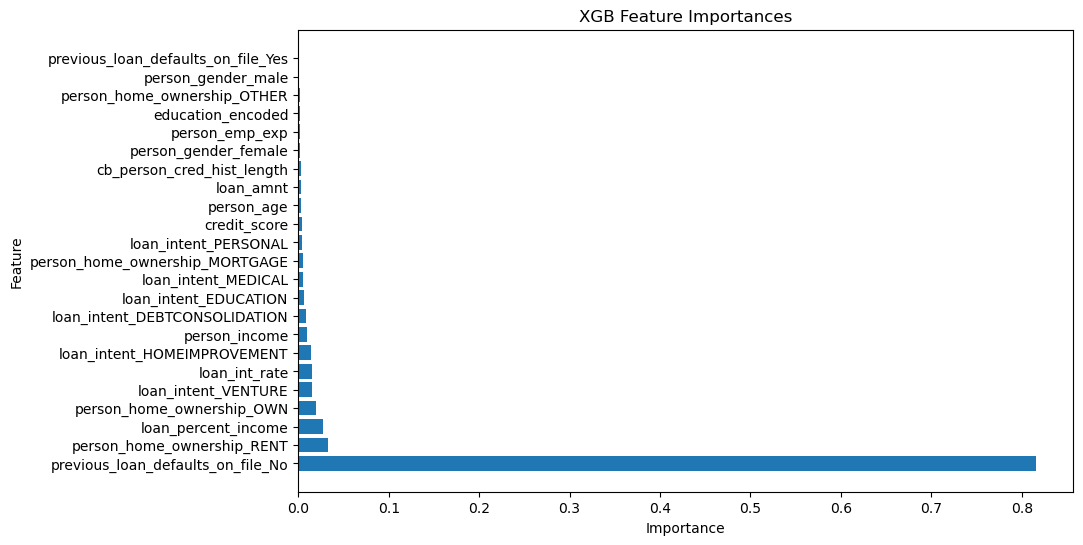

In [173]:
xgb_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': xgb_importances})
xgb_feature_importances = xgb_feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importances['feature'], xgb_feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGB Feature Importances')
plt.show()

## RANDOM FOREST MODEL

In [174]:
#Create and Fit a Random Forest model

# Create the StandardScaler instance
# Fit the Standard Scaler with the training data
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)


# Train a Random Forest Classifier model and print the model score
rfc_model = RandomForestClassifier(n_estimators=128, random_state=1)
rfc_model.fit(X_train_scaled, y_train)

rfc_predictions = rfc_model.predict(X_test_scaled)

rfc_acc_score = accuracy_score(y_test, rfc_predictions)

f1_score_rfc_model = f1_score(y_test, xgb_y_pred)

# Evaluate the model and print the model score
# The training data score indicates overfitting!!!!!!!!!!!!
print(f"Training Data Score: {rfc_model.score(X_train_scaled, y_train)}")
print(f'Testing Score: {rfc_model.score(X_test_scaled, y_test)}')
print(f"Random Forest Accuracy Score : {rfc_acc_score}")
print(f"Random Forest F1 Score: {f1_score_rfc_model}")

Training Data Score: 1.0
Testing Score: 0.9305944251651181
Random Forest Accuracy Score : 0.9305944251651181
Random Forest F1 Score: 0.8350404312668464


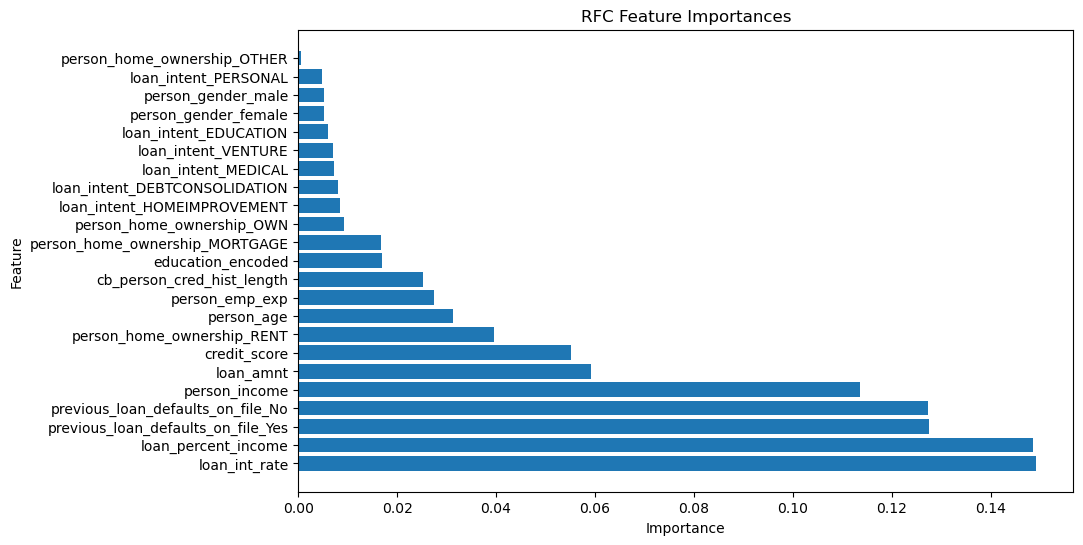

In [175]:
rfc_importances = rfc_model.feature_importances_
rfc_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rfc_importances})
rfc_feature_importances = rfc_feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rfc_feature_importances['feature'], rfc_feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('RFC Feature Importances')
plt.show()

## DECISION TREE MODEL

In [176]:
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Create the decision tree classifier instance
tree_model = tree.DecisionTreeClassifier()

# Fit the Decision Tree model
tree_model = tree_model.fit(X_train_scaled, y_train)

# Making predictions using the decision tree data
tree_predictions = tree_model.predict(X_test_scaled)

# Calculate the accuracy score
tree_acc_score = accuracy_score(y_test, tree_predictions)

#Calculate the F1 score
f1_score_tree_model = f1_score(y_test, tree_predictions)

print(f"Training Data Score: {tree_model.score(X_train_scaled, y_train)}")
print(f'Testing Score: {tree_model.score(X_test_scaled, y_test)}')
print(f"Decision Tree Accuracy Score : {tree_acc_score}")
print(f"Decision Tree F1 Score: {f1_score_tree_model}")

Training Data Score: 1.0
Testing Score: 0.8958916377476771
Decision Tree Accuracy Score : 0.8958916377476771
Decision Tree F1 Score: 0.7637195121951219


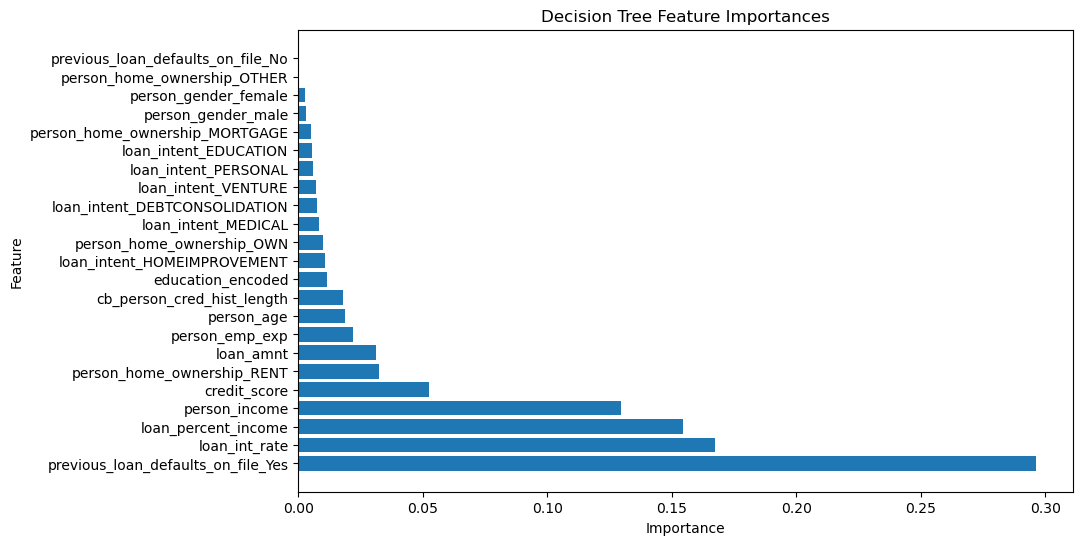

In [177]:
tree_importances = tree_model.feature_importances_
tree_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': tree_importances})
tree_feature_importances = tree_feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(tree_feature_importances['feature'], tree_feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

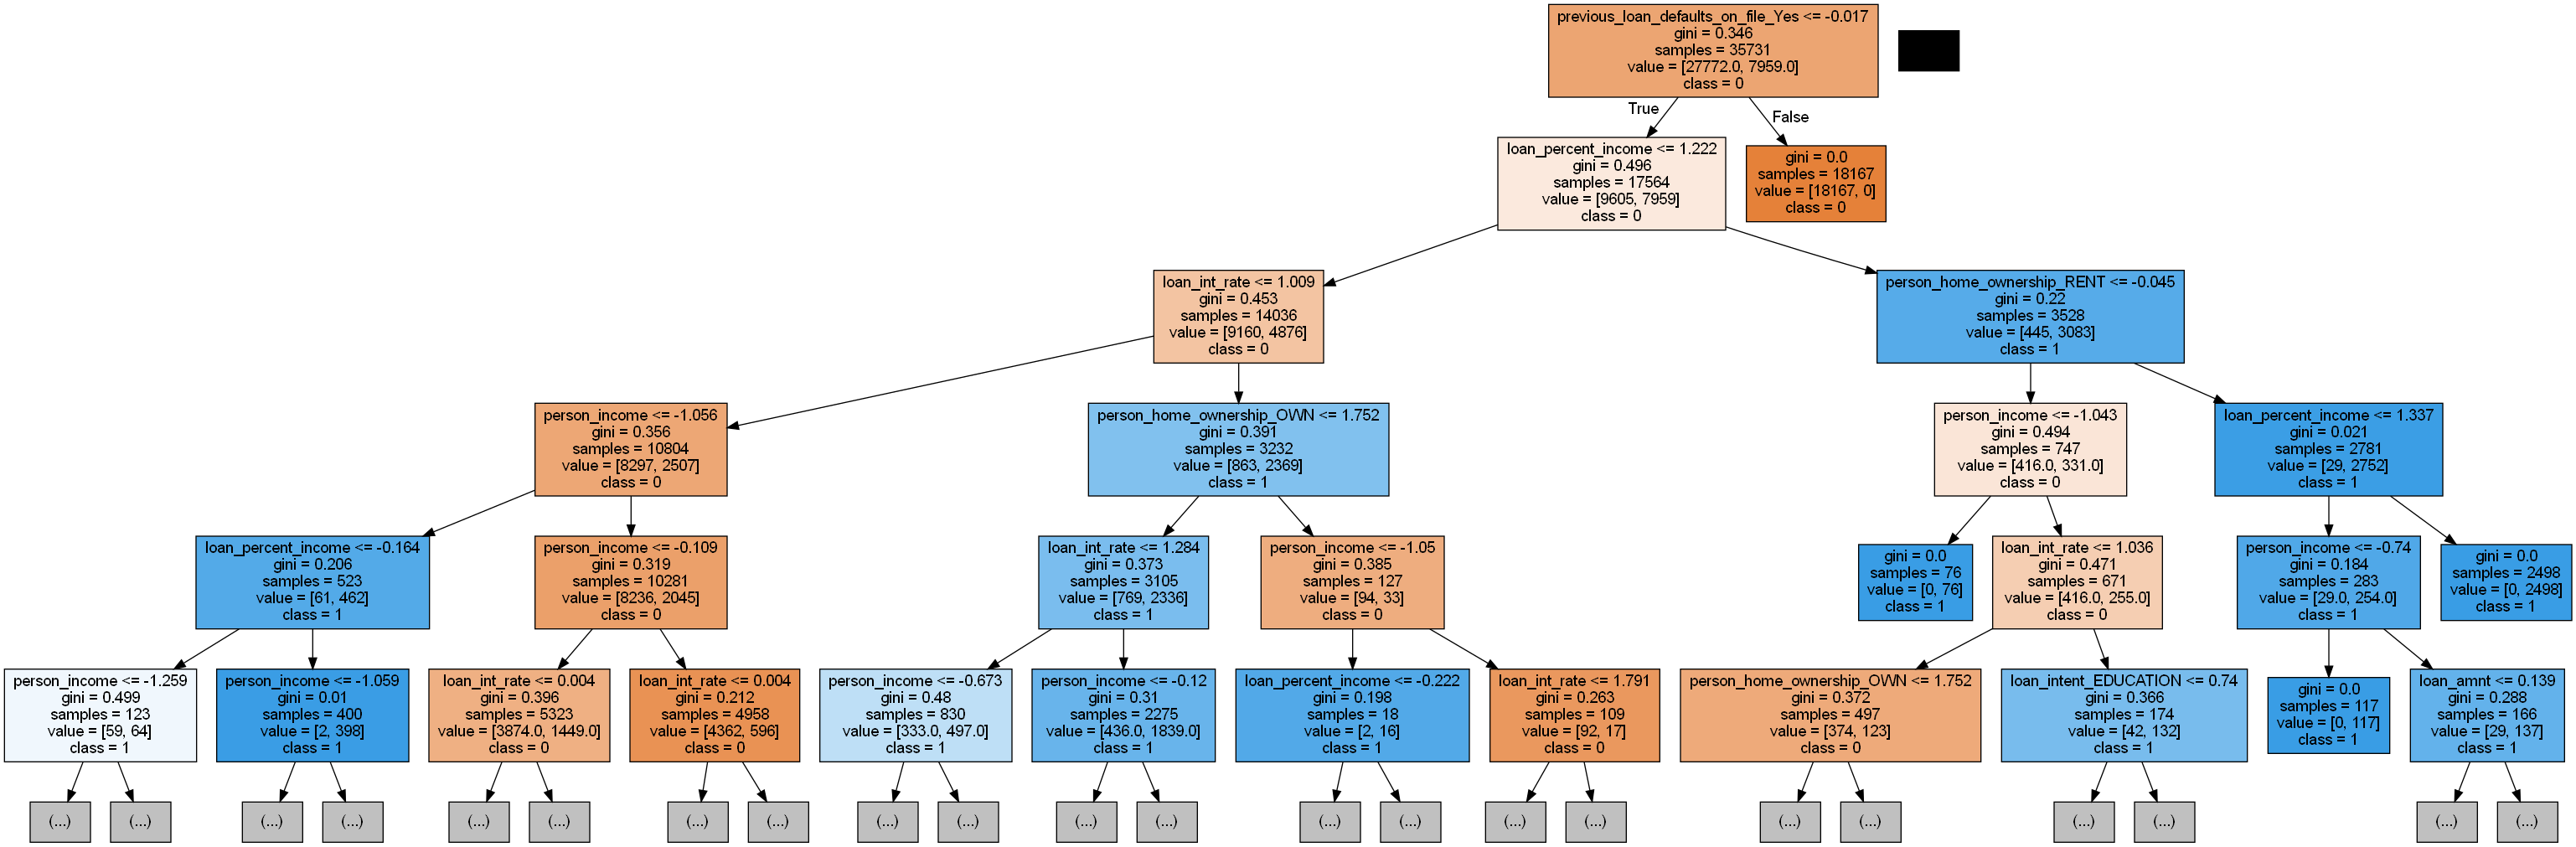

In [178]:
# Visualize the decision tree
# Create DOT data
dot_data = tree.export_graphviz(
    tree_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [179]:
# Save the tree as PDF
file_path = 'images/ML_Bank_tree.pdf'
graph.write_pdf(file_path)
# Save the tree as PNG
file_path = 'images/ML_Bank_tree.png'
graph.write_png(file_path)

True

## EXTRA TREES MODEL

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
extra_model = tree.ExtraTreeClassifier()
extra_model = extra_model.fit(X_train_scaled, y_train)
predictions = extra_model.predict(X_test_scaled)
et_acc_score = accuracy_score(y_test, predictions)
f1_score_extra_model = f1_score(y_test, predictions)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print(f"Extra Trees Accuracy Score : {et_acc_score}")
print(f"Extra Trees F1 Score: {f1_score_extra_model}")

Training Score: 1.0
Testing Score: 0.9202041912950026
Extra Trees Accuracy Score : 0.8638724699982089
Extra Trees F1 Score: 0.6957566052842273


## COMPARISON OF MODEL PERFORMANCE 

In [181]:
model_results = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Accuracy Score': lr_acc_score, 'F1 Score': f1_score_lr_model},
    {'Model': 'KNN', 'Accuracy Score': knn_acc_score, 'F1 Score': f1_score_knn_model},
    {'Model': 'XGBoost', 'Accuracy Score': xgb_acc_score, 'F1 Score': f1_score_xgb_model},
    {'Model': 'Random Forest', 'Accuracy Score': rfc_acc_score, 'F1 Score': f1_score_rfc_model},
    {'Model': 'Decision Tree', 'Accuracy Score': tree_acc_score, 'F1 Score': f1_score_tree_model},
    {'Model': 'Extra Trees', 'Accuracy Score': et_acc_score, 'F1 Score': f1_score_extra_model}
])

#model_results = model_results.reset_index(drop=True)
model_results = model_results.set_index(pd.Index(range(1, len(model_results) + 1)))

styled_df = model_results.style.format({'Accuracy Score': '{:.2f}', 'F1 Score': '{:.2f}'}) \
                         .set_caption('Model Performance') \
                         .set_table_styles([{'selector': 'th', 'props': [('font-size', '12px'), ('text-align', 'center')]},
                                            {'selector': 'td', 'props': [('font-size', '12px'), ('text-align', 'center')]}])


styled_df



## HANDLE IMBALANCED DATASET

### SMOTE


In [182]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [183]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_scaled, y_train)

In [184]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

loan_status
0    26112
1    26112
Name: count, dtype: int64

In [185]:
# Instantiate a new RandomForestClassier model 
smote_model = RandomForestClassifier()

# Fit the resampled data to the new model
smote_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [186]:
# Predict labels for original scaled testing features
y_pred = rfc_model.predict(X_test_scaled)


In [187]:
# Predict labels for resampled testing features
smote_y_pred = smote_model.predict(X_test_scaled)

In [188]:
# Print classification reports
print(f"Classification Report - Random Forest Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, smote_y_pred))

Classification Report - Random Forest Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8649
           1       0.98      0.96      0.97      2517

    accuracy                           0.99     11166
   macro avg       0.98      0.97      0.98     11166
weighted avg       0.99      0.99      0.99     11166

---------
Classification Report - Resampled Data - SMOTE
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8649
           1       0.79      0.85      0.82      2517

    accuracy                           0.92     11166
   macro avg       0.87      0.89      0.88     11166
weighted avg       0.92      0.92      0.92     11166



### SMOTEENN

In [189]:
# Import SMOTEEN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

In [190]:
# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [191]:
# Instantiate a new RandomForestClassier model
smoteenn_model = RandomForestClassifier()

# Fit the resampled data the new model
smoteenn_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [192]:
# Predict labels for resampled testing features
smoteenn_y_pred = smoteenn_model.predict(X_test_scaled)

In [193]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8649
           1       0.98      0.96      0.97      2517

    accuracy                           0.99     11166
   macro avg       0.98      0.97      0.98     11166
weighted avg       0.99      0.99      0.99     11166

---------
Classification Report - Resampled Data - SMOTEENN
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8649
           1       0.67      0.94      0.78      2517

    accuracy                           0.88     11166
   macro avg       0.82      0.90      0.85     11166
weighted avg       0.91      0.88      0.89     11166



## LOAN PRE-APPROVAL SIMPLE

In [194]:
loan_df = new_df[['person_income','person_age','loan_amnt','credit_score','previous_loan_defaults_on_file_No','loan_status']]
loan_df.head()

person_income  person_age  loan_amnt  credit_score  \
0        12282.0        21.0     1000.0           504   
1        12438.0        25.0     5500.0           635   
2        12951.0        21.0     2500.0           532   
3        12739.0        21.0     1600.0           640   
4        13113.0        21.0     4500.0           651   

   previous_loan_defaults_on_file_No  loan_status  
0                                0.0            0  
1                                1.0            1  
2                                1.0            1  
3                                1.0            1  
4                                1.0            1

In [195]:
loan_df = new_df[['person_age','person_income','credit_score','loan_amnt','loan_status','previous_loan_defaults_on_file_No']]

y = loan_df['loan_status']
X = loan_df.drop('loan_status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

loan_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)
loan_xgb.fit(X_train,y_train)
loan_xgb_test = loan_xgb.predict(X_test)
loan_xgb_acc_score = accuracy_score(y_test, loan_xgb_test)

# print(f"Training Data Score: {loan_xgb.score(y_train, X_train)}")
#print(f'Testing Score: {loan_xgb.score(y_test, X_test)}')
print(f"XGB Loan Pre-Approval Accuracy Score : {loan_xgb_acc_score}")

XGB Loan Pre-Approval Accuracy Score : 0.8804433001231389


## LOAN APPROVAL PROGRAM

In [196]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox

# Function to process responses and give an answer
def process_response():
    try:
        # Get age input and validate
        age = int(age_entry.get())
        if age < 18:
            messagebox.showerror("Not eligible", "You must be at least 18 years old to apply for a loan.")
            return
        # Get income input and validate
        income = int(income_entry.get())
        if income < 9999:
            messagebox.showerror("Not eligible", "You must have an income of at least $10,000 to apply for a loan.")
            return
        #Get credit score input and validate
        credit_score = int(credit_score_entry.get())
        if credit_score < 300:
            messagebox.showerror("Not eligible", "You must have a valid credit score to apply for a loan.")
            return
        elif credit_score > 850:
            messagebox.showerror("Not eligible", "You must have a valid credit score to apply for a loan.")
            return
        #Get loan amount input and validate
        loan_amnt = int(loan_amnt_entry.get())
        # Loan Approval function
        def loan_approval(person_age, person_income, credit_score, loan_amnt):
            user_input = pd.DataFrame({'person_age': [person_age],'person_income': [person_income], 'credit_score': [credit_score], 'loan_amnt':[loan_amnt]})
            prediction = np.random.rand()
            #prediction = loan_xgb.predict(user_input)
            if prediction > 0.5:
                return 'Loan Approved'
            else:
                return 'Loan Denied'
        # Make a prediction and print result
        result = loan_approval(person_age, person_income, credit_score, loan_amnt)
        print(result)
        messagebox.showinfo("Result", result)
    except ValueError:
        # Handle non-numeric input
        messagebox.showerror("Invalid Input", "Please enter a valid numeric input.")
# Create the main application window
app = tk.Tk()
app.title("Loan Approval Application")
# Header
tk.Label(app, text="Loan Approval Application").pack()
# Age Input
tk.Label(app, text="Enter your age:").pack()
age_entry = tk.Entry(app)
age_entry.pack()
# Income Input
tk.Label(app, text="Enter your annual income:").pack()
income_entry = tk.Entry(app)
income_entry.pack()
#Credit Score Input
tk.Label(app, text="Enter your credit score:").pack()
credit_score_entry = tk.Entry(app)
credit_score_entry.pack()
#Loan Amount Input
tk.Label(app, text="Enter your requested loan amount:").pack()
loan_amnt_entry = tk.Entry(app)
loan_amnt_entry.pack()
# Question 1: Loan type request
tk.Label(app, text="What type of loan are you looking for?").pack()
question1_var = tk.StringVar()
tk.Radiobutton(app, text="Personal", variable=question1_var, value="Personal").pack()
tk.Radiobutton(app, text="Business", variable=question1_var, value="Business").pack()
tk.Radiobutton(app, text="Education", variable=question1_var, value="Education").pack()
tk.Radiobutton(app, text="Debt Consolidation", variable=question1_var, value="Debt Consolidation").pack()
tk.Radiobutton(app, text="Medical", variable=question1_var, value="Medical").pack()
tk.Radiobutton(app, text="Home Improvement", variable=question1_var, value="Home Improvement").pack()
# Question 2: Previous defaults request
tk.Label(app, text="Do you have any previous defaults on file?").pack()
question2_var = tk.StringVar()
tk.Radiobutton(app, text="Yes", variable=question2_var, value="Yes").pack()
tk.Radiobutton(app, text="No", variable=question2_var, value="No").pack()
# Question 3: Highest education level request
tk.Label(app, text="What is the highest education level you have obtained?").pack()
question3_var = tk.StringVar()
tk.Radiobutton(app, text="High School Diploma", variable=question3_var, value='HS').pack()
tk.Radiobutton(app, text="Associate's Degree", variable=question3_var, value= 'Associate').pack()
tk.Radiobutton(app, text="Bachelor's Degree", variable=question3_var, value= 'Bachelor').pack()
tk.Radiobutton(app, text="Master's Degree", variable=question3_var, value = 'Master' ).pack()
tk.Radiobutton(app, text="Doctorate", variable=question3_var, value = 'Phd').pack()
# Store user input
person_age = [age_entry]
person_income = [income_entry]
credit_score = [credit_score_entry]
loan_amnt = [loan_amnt_entry]
loan_type = [question1_var.get()]
previous_default = [question2_var.get()]
education_level = [question3_var.get()]
# Loan Approval function
def loan_approval(person_age, person_income, credit_score, loan_amnt):
    user_input = pd.DataFrame({'person_age': [person_age],'person_income': [person_income], 'credit_score': [credit_score], 'loan_amnt':[loan_amnt]})
    #prediction = np.random.rand()
    prediction = loan_xgb.predict(user_input)
    if prediction > 0.5:
        return 'Loan Approved'
    else:
        return 'Loan Denied'
# Submit Button
tk.Button(app, text="Submit", command=process_response).pack()
# Run the application
app.mainloop()













Loan Denied
Loan Approved
Loan Denied
